<a href="https://colab.research.google.com/github/AryanDineshGour/django-cms-quickstart/blob/main/Toxic_Comment_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pandas → Dataset load karne ke liye
#tensorflow.keras → Deep Learning model banane ke liye
#Tokenizer & pad_sequences → Text preprocessing ke liye
#rain_test_split → Dataset ko training aur testing me divide karne ke liyeimport numpy as np

import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Toxic Comment NLP/train.csv")
df = df[['comment_text', 'toxic']]  # Keep only relevant columns


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['comment_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['comment_text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['toxic'], test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(10000, 64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
print(df.isnull().sum())  # Check for missing values

comment_text    0
toxic           0
dtype: int64


In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 330s 162ms/step - accuracy: 0.9024 - loss: 0.3111 - val_accuracy: 0.9304 - val_loss: 0.1995
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 330s 165ms/step - accuracy: 0.9489 - loss: 0.1556 - val_accuracy: 0.9612 - val_loss: 0.1093
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 401s 175ms/step - accuracy: 0.9652 - loss: 0.0964 - val_accuracy: 0.9612 - val_loss: 0.1094
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 383s 176ms/step - accuracy: 0.9691 - loss: 0.0821 - val_accuracy: 0.9601 - val_loss: 0.1163
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 387s 178ms/step - accuracy: 0.9741 - loss: 0.0676 - val_accuracy: 0.9585 - val_loss: 0.1327


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

998/998 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9592 - loss: 0.1309
Test Accuracy: 95.85%


In [ ]:
df.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
df.tail()

,comment_text,toxic
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0
159570,"""\nAnd ... I really don't think you understand...",0


In [ ]:
df.describe()

,toxic
count,159571.000000
mean,0.095844
std,0.294379
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


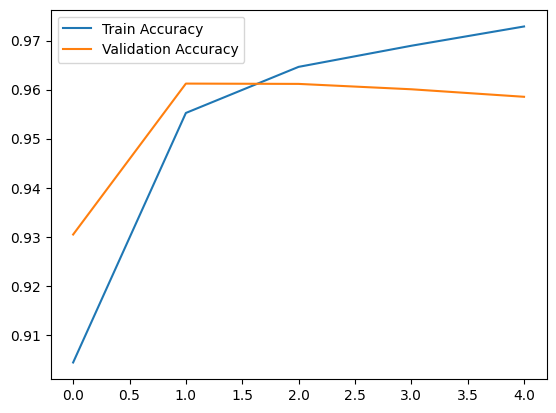

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
#def predict_toxicity(comment):
#    seq = tokenizer.texts_to_sequences([comment])
#   padded = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
#   prediction = model.predict(padded)
#   return "Toxic" if prediction > 0.5 else "Not Toxic"

# Test with an example
#example = "i m bitch ."
#print(f"Comment: {example}\nPrediction: {predict_toxicity(example)}")

In [ ]:
# Function to predict the toxicity level for user input
def predict_toxicity(comment):
    # Preprocess the input text
    sequence = tokenizer.texts_to_sequences([comment])
    padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

    # Get prediction
    prob = model.predict(padded_sequence)[0][0]

    # Define thresholds for toxicity levels
    if prob < 0.3:
        level = "Non-toxic"
    elif 0.3 <= prob < 0.6:
        level = "Mildly toxic"
    elif 0.6 <= prob < 0.9:
        level = "Moderately toxic"
    else:
        level = "Highly toxic"

    print(f"Comment: {comment}")
    print(f"Toxicity Level: {level} (Probability: {prob:.2f})")

# Example usage
user_comment = input("Enter a comment: ")
predict_toxicity(user_comment)


Enter a comment: What the fuck are you doing here ?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Comment: What the fuck are you doing here ?
Toxicity Level: Highly toxic (Probability: 0.99)
